In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore') 

In [254]:
Loandata=pd.read_csv('loan approval data.csv')
Loandata

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Unnamed: 14
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,NaN
4996,4997,30,4,15,92037,4,0.4,1,1,0,0,0,1,0,NaN
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,NaN
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,NaN


In [255]:
Loandata.shape

(5000, 15)

In [256]:
Loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  Unnamed: 14         0 non-null      float64
dtypes: float64(2), int64(13)
memory usage: 586.1 KB


In [257]:
Loandata.isnull().sum()

ID                       0
Age                      0
Experience               0
Income                   0
ZIP_Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Personal_Loan            0
Securities_Account       0
CD_Account               0
Online                   0
CreditCard               0
Unnamed: 14           5000
dtype: int64

In [258]:
Loandata.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Unnamed: 14
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,0.0
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,0.307600,0.096000,0.104400,0.06040,0.596800,0.294000,NaN
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,0.461546,0.294621,0.305809,0.23825,0.490589,0.455637,NaN
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,NaN
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,NaN


In [265]:
Loandata.drop(columns=['Unnamed: 14','ZIP_Code'],inplace=True)
Loandata.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [267]:
Ageskew= Loandata['Age'].skew()
Expskew=Loandata['Experience'].skew()
Incskew=Loandata['Income'].skew()
Famskew=Loandata['Family'].skew()
CCskew=Loandata['CCAvg'].skew()
Eduskew=Loandata['Education'].skew()
Mortskew=Loandata['Mortgage'].skew()
PLskew=Loandata['Personal_Loan'].skew()
SAskew=Loandata['Securities_Account'].skew()
Onlineskew=Loandata['Online'].skew()
creditskew=Loandata['CreditCard'].skew()

print(f'Skewness of Age: {Ageskew}')
print(f'Skewness of Experience : {Expskew}')
print(f'Skewness of Income: {Incskew}')
print(f'Skewness of Family: {Famskew}')
print(f'Skewness of CCAvg: {CCskew}')
print(f'Skewness of Education: {Eduskew}')
print(f'Skewness of Mortgage: {Mortskew}')
print(f'Skewness of Personal.Loan: {PLskew}')
print(f'Skewness of SecurityAccount: {SAskew}')
print(f'Skewness of Online: {Onlineskew}')
print(f'Skewness of CreditCard: {creditskew}')

Skewness of Age: -0.02934068151284029
Skewness of Experience : -0.026324688402384513
Skewness of Income: 0.8413386072610816
Skewness of Family: 0.15522066944367582
Skewness of CCAvg: 1.5984433366678663
Skewness of Education: 0.22709331566088503
Skewness of Mortgage: 0.8340530732520982
Skewness of Personal.Loan: 2.743606655894059
Skewness of SecurityAccount: 2.588268372959341
Skewness of Online: -0.3947853269234487
Skewness of CreditCard: 0.9045894514231758


In [271]:
sns.histplot(Loandata['Age'], kde=True, ax=ax[0, 0])
sns.histplot(Loandata['Experience'], kde=True, ax=ax[0, 1])
sns.histplot(Loandata['Income'], kde=True, ax=ax[0, 2])
sns.histplot(Loandata['Family'], kde=True, ax=ax[1, 1])
sns.histplot(Loandata['CCAvg'], kde=True, ax=ax[1, 2])
sns.histplot(Loandata['Education'], kde=True, ax=ax[2, 0])
sns.histplot(Loandata['Mortgage'], kde=True, ax=ax[2, 1])
sns.histplot(Loandata['Personal_Loan'], kde=True, ax=ax[2, 2])
sns.histplot(Loandata['Securities_Account'], kde=True, ax=ax[3, 0])
sns.histplot(Loandata['Online'], kde=True, ax=ax[3, 1])
sns.histplot(Loandata['CreditCard'], kde=True, ax=ax[3, 2])


<Axes: xlabel='CreditCard', ylabel='Density'>

In [272]:
Loandata.Personal_Loan.value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [273]:
X_features = list(Loandata.columns ) 
X_features.remove( 'Personal_Loan' ) 
X_features 

['ID',
 'Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [274]:
X = Loandata[X_features]  # Selecting features using the list
Y = Loandata['Personal_Loan']  # Target variable

In [275]:
print(X.shape)
print(Y.shape)

(5000, 12)
(5000,)


In [276]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Building Logistic Regression Model

In [278]:
import statsmodels.api as sm 

logit = sm.Logit(y_train, X_train) 
logit_model = logit.fit() 

Optimization terminated successfully.
         Current function value: 0.134258
         Iterations 9


# Printing Model Summar

In [280]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Method:           MLE        
Dependent Variable:  Personal_Loan    Pseudo R-squared: 0.564      
Date:                2025-04-22 20:04 AIC:              963.8055   
No. Observations:    3500             BIC:              1037.7318  
Df Model:            11               Log-Likelihood:   -469.90    
Df Residuals:        3488             LL-Null:          -1077.3    
Converged:           1.0000           LLR p-value:      1.0692e-253
No. Iterations:      9.0000           Scale:            1.0000     
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0001   0.0001  -1.8243 0.0681 -0.0002  0.0000
Age                -0.4841   0.0259 -18.6919 0.0000 -0.5348 -0.4333
Experience          0.4888   0.0286  17.0873 0.0000  0.4327  0.5448
Income              0.0499   0.0029  17.0842 0.0000  0.0442  0.0556
Family              0.6396   0.0845   7.5714 0.0000  0.4740  0.8051
CCAvg               0.1042   0.0472   2.2098 0.0271  0.0118  0.1966
Education           1.6419   0.1301  12.6169 0.0000  1.3869  1.8970
Mortgage            0.1448   0.1853   0.7813 0.4346 -0.2184  0.5080
Securities_Account -1.0980   0.3492  -3.1443 0.0017 -1.7825 -0.4136
CD_Account          3.7151   0.3838   9.6806 0.0000  2.9629  4.4672
Online             -0.6128   0.1847  -3.3171 0.0009 -0.9748 -0.2507
CreditCard         -1.2722   0.2447  -5.1986 0.0000 -1.7518 -0.7925
===================================================================

"""

 # Model Dignostics

In [282]:
def get_significant_vars( lm ): 
    var_p_vals_df = pd.DataFrame( lm.pvalues ) 
    var_p_vals_df['vars'] = var_p_vals_df.index 
    var_p_vals_df.columns = ['pvals', 'vars'] 
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [283]:
significant_vars = get_significant_vars( logit_model ) 
significant_vars 

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [284]:
final_logit = sm.Logit( y_train, 
sm.add_constant( X_train[significant_vars] ) ).fit() 

Optimization terminated successfully.
         Current function value: 0.129642
         Iterations 9


In [285]:
 final_logit.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Method:           MLE        
Dependent Variable:   Personal_Loan    Pseudo R-squared: 0.579      
Date:                 2025-04-22 20:04 AIC:              929.4972   
No. Observations:     3500             BIC:              997.2629   
Df Model:             10               Log-Likelihood:   -453.75    
Df Residuals:         3489             LL-Null:          -1077.3    
Converged:            1.0000           LLR p-value:      1.0127e-261
No. Iterations:       9.0000           Scale:            1.0000     
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -12.1533   1.9326 -6.2885 0.0000 -15.9412 -8.3655
Age                 -0.0403   0.0716 -0.5621 0.5741  -0.1807  0.1002
Experience           0.0536   0.0712  0.7535 0.4512  -0.0858  0.1931
Income               0.0529   0.0030 17.4049 0.0000   0.0470  0.0589
Family               0.7007   0.0876  7.9967 0.0000   0.5290  0.8724
CCAvg                0.1143   0.0479  2.3863 0.0170   0.0204  0.2082
Education            1.6327   0.1342 12.1641 0.0000   1.3696  1.8958
Securities_Account  -1.0022   0.3524 -2.8442 0.0045  -1.6928 -0.3116
CD_Account           3.6907   0.3891  9.4852 0.0000   2.9281  4.4533
Online              -0.5644   0.1882 -2.9988 0.0027  -0.9332 -0.1955
CreditCard          -1.1847   0.2487 -4.7631 0.0000  -1.6722 -0.6972
====================================================================

"""

# Predicting on Test Data

In [287]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict
                            (sm.add_constant( X_test[significant_vars] ) ) } )   

In [288]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
790,0,0.001005
2879,0,0.028091
2372,0,0.000249
1351,0,0.015481
3382,0,0.142891
3433,0,0.001864
1129,1,0.038035
549,0,0.001506
2835,0,0.000352
626,0,0.001692


In [289]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( 
lambda x: 1 if x > 0.5 else 0) 
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
790,0,0.001005,0
2879,0,0.028091,0
2372,0,0.000249,0
1351,0,0.015481,0
3382,0,0.142891,0
3433,0,0.001864,0
1129,1,0.038035,0
549,0,0.001506,0
2835,0,0.000352,0
626,0,0.001692,0


# Creating a Confusion Matrix

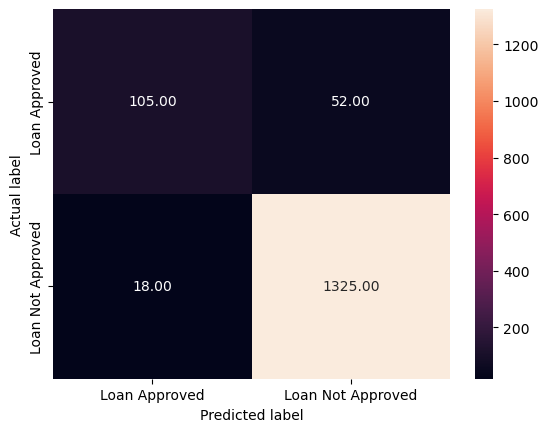

In [305]:
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn import metrics 

# Function to draw the confusion matrix
def draw_cm(actual, predicted): 
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0]) 
    sn.heatmap(cm, annot=True, fmt='.2f',  
               xticklabels=["Loan Approved", "Loan Not Approved"], 
               yticklabels=["Loan Approved", "Loan Not Approved"]) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label') 
    plt.show()

# Call the function with the corrected parameters
draw_cm(y_pred_df['actual'], y_pred_df['predicted'])


# Measuring Accuracies

In [309]:
 print( metrics.classification_report( y_pred_df.actual, 
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.67      0.75       157

    accuracy                           0.95      1500
   macro avg       0.91      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500



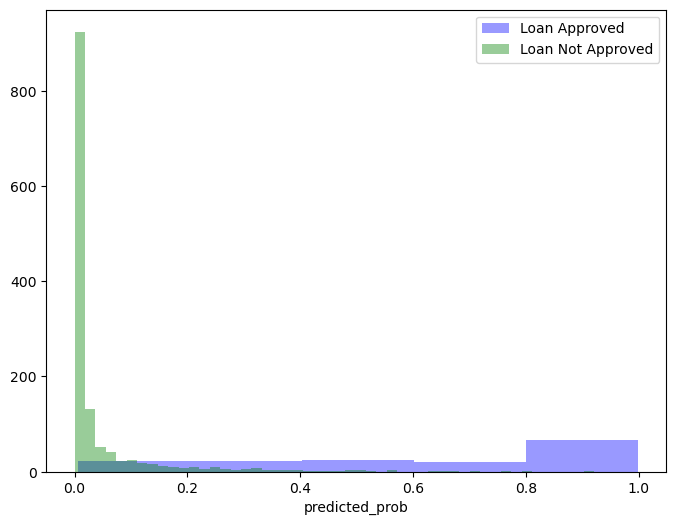

In [307]:
plt.figure( figsize = (8,6) ) 
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
kde=False, color = 'b', 
label = 'Loan Approved' ) 
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
kde=False, color = 'g', 
label = 'Loan Not Approved' ) 
plt.legend() 
plt.show() 

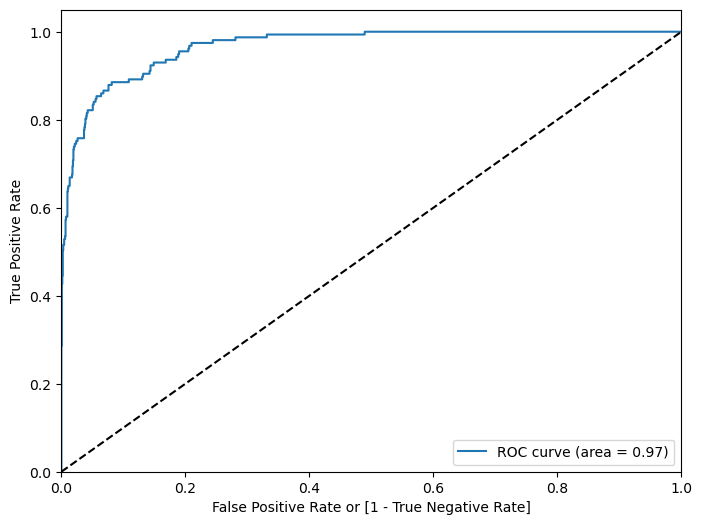

In [317]:
def draw_roc(actual, probs): 
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(
        actual, 
        probs, 
        drop_intermediate=False
    ) 
    # Compute Area Under the Curve (AUC)
    auc_score = metrics.roc_auc_score(actual, probs) 
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score) 
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc="lower right") 
    plt.show() 
    
    return fpr, tpr, thresholds 

# Call the function with actual and predicted probabilities
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)


In [319]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, 
y_pred_df.predicted_prob  ) 
round( float( auc_score ), 2 ) 

0.97